# Create subplots

There are two different ways to create subplots in `PolarToolkit`, which we demonstrate here.

Import the modules

In [1]:
import os

from polartoolkit import fetch, maps

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

Define the region of interest and fetch the datasets

In [4]:
# manually define a geographic region in meters in the South Polar Stereographic
# Projection (EPSG) in the format (x_min, xmax, y_min, y_max)
region = (-1800e3, -1000e3, -1200e3, -700e3)

grid1 = fetch.bedmap2(layer="bed", region=region)
grid2 = fetch.gravity(
    version="antgg-2021", anomaly_type="FA", region=region
).free_air_anomaly

## Method 1: `maps.subplots()`

This functions takes a list of grids and plots each of them. You can customize the number of rows and columns by passing a tuple of (number rows, number columns) to `dims`. All the arguments are passed to `maps.plot_grd()` to enable customing each plot. You can also customize each plot individually by passing lists of parameter values (1 for each subplot) to the following arguments: `titles`, `cmaps`, `cbar_labels`, and `cbar_units`.  

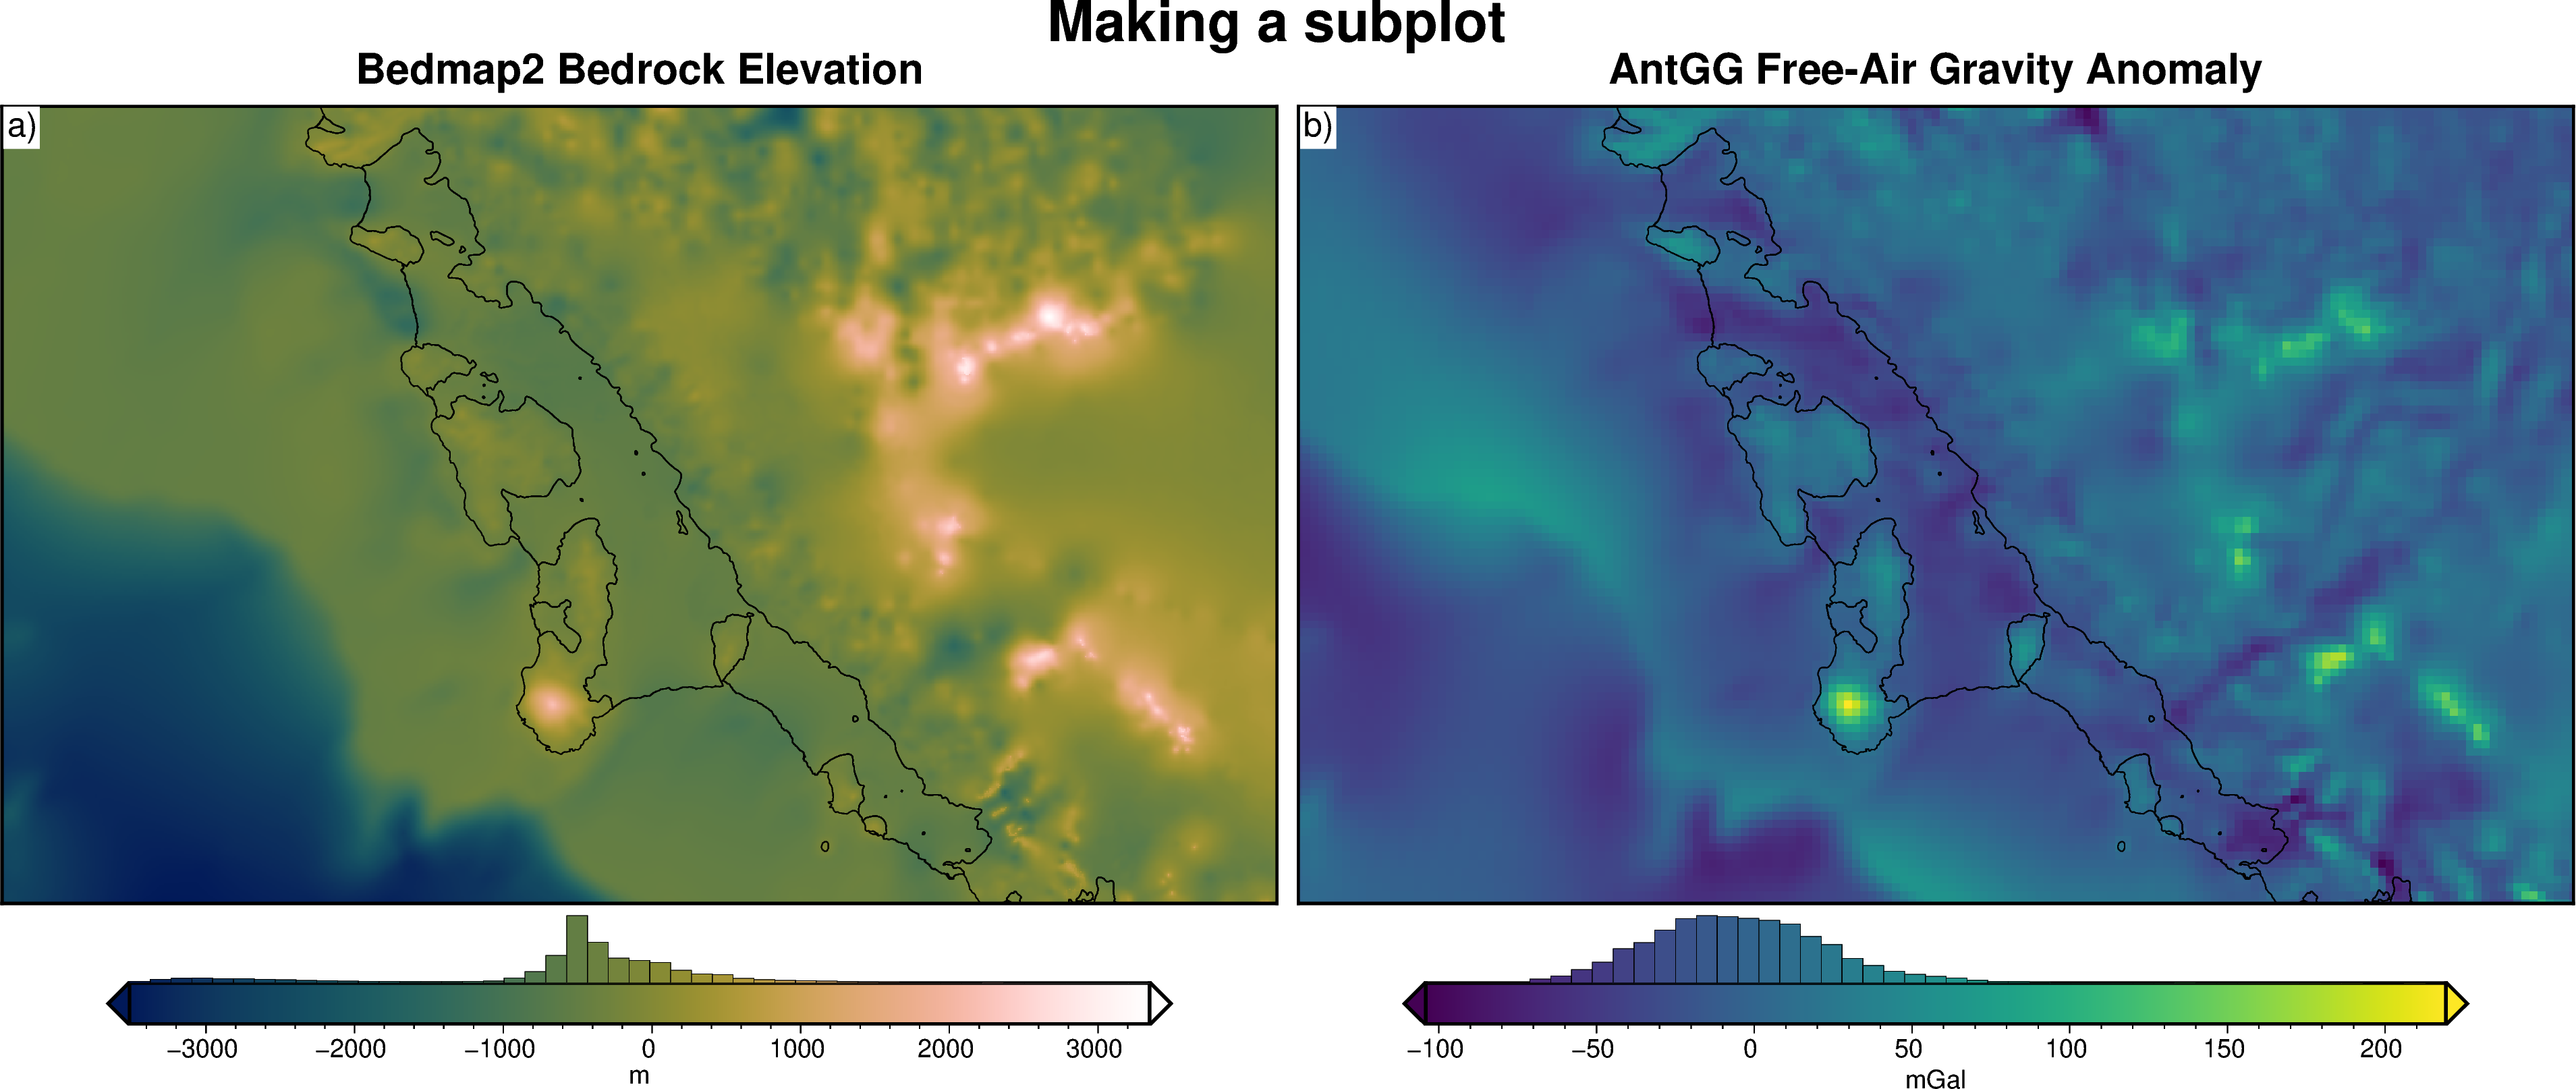

In [5]:
fig = maps.subplots(
    [grid1, grid2],
    # dims=(1,2) # 1 row, 2 columns, if you want to change from the default
    fig_title="Making a subplot",
    titles=["Bedmap2 Bedrock Elevation", "AntGG Free-Air Gravity Anomaly"],
    cbar_labels=["m", "mGal"],
    coast=True,
    cmaps=["batlowW", "viridis"],
    hist=True,
)

fig.show(dpi=200)

## Method 2: `origin_shift`
For more control over customizing each subplot, or changing the layout of the subplots, you can use the argument `origin_shift` to setup your subplots. 

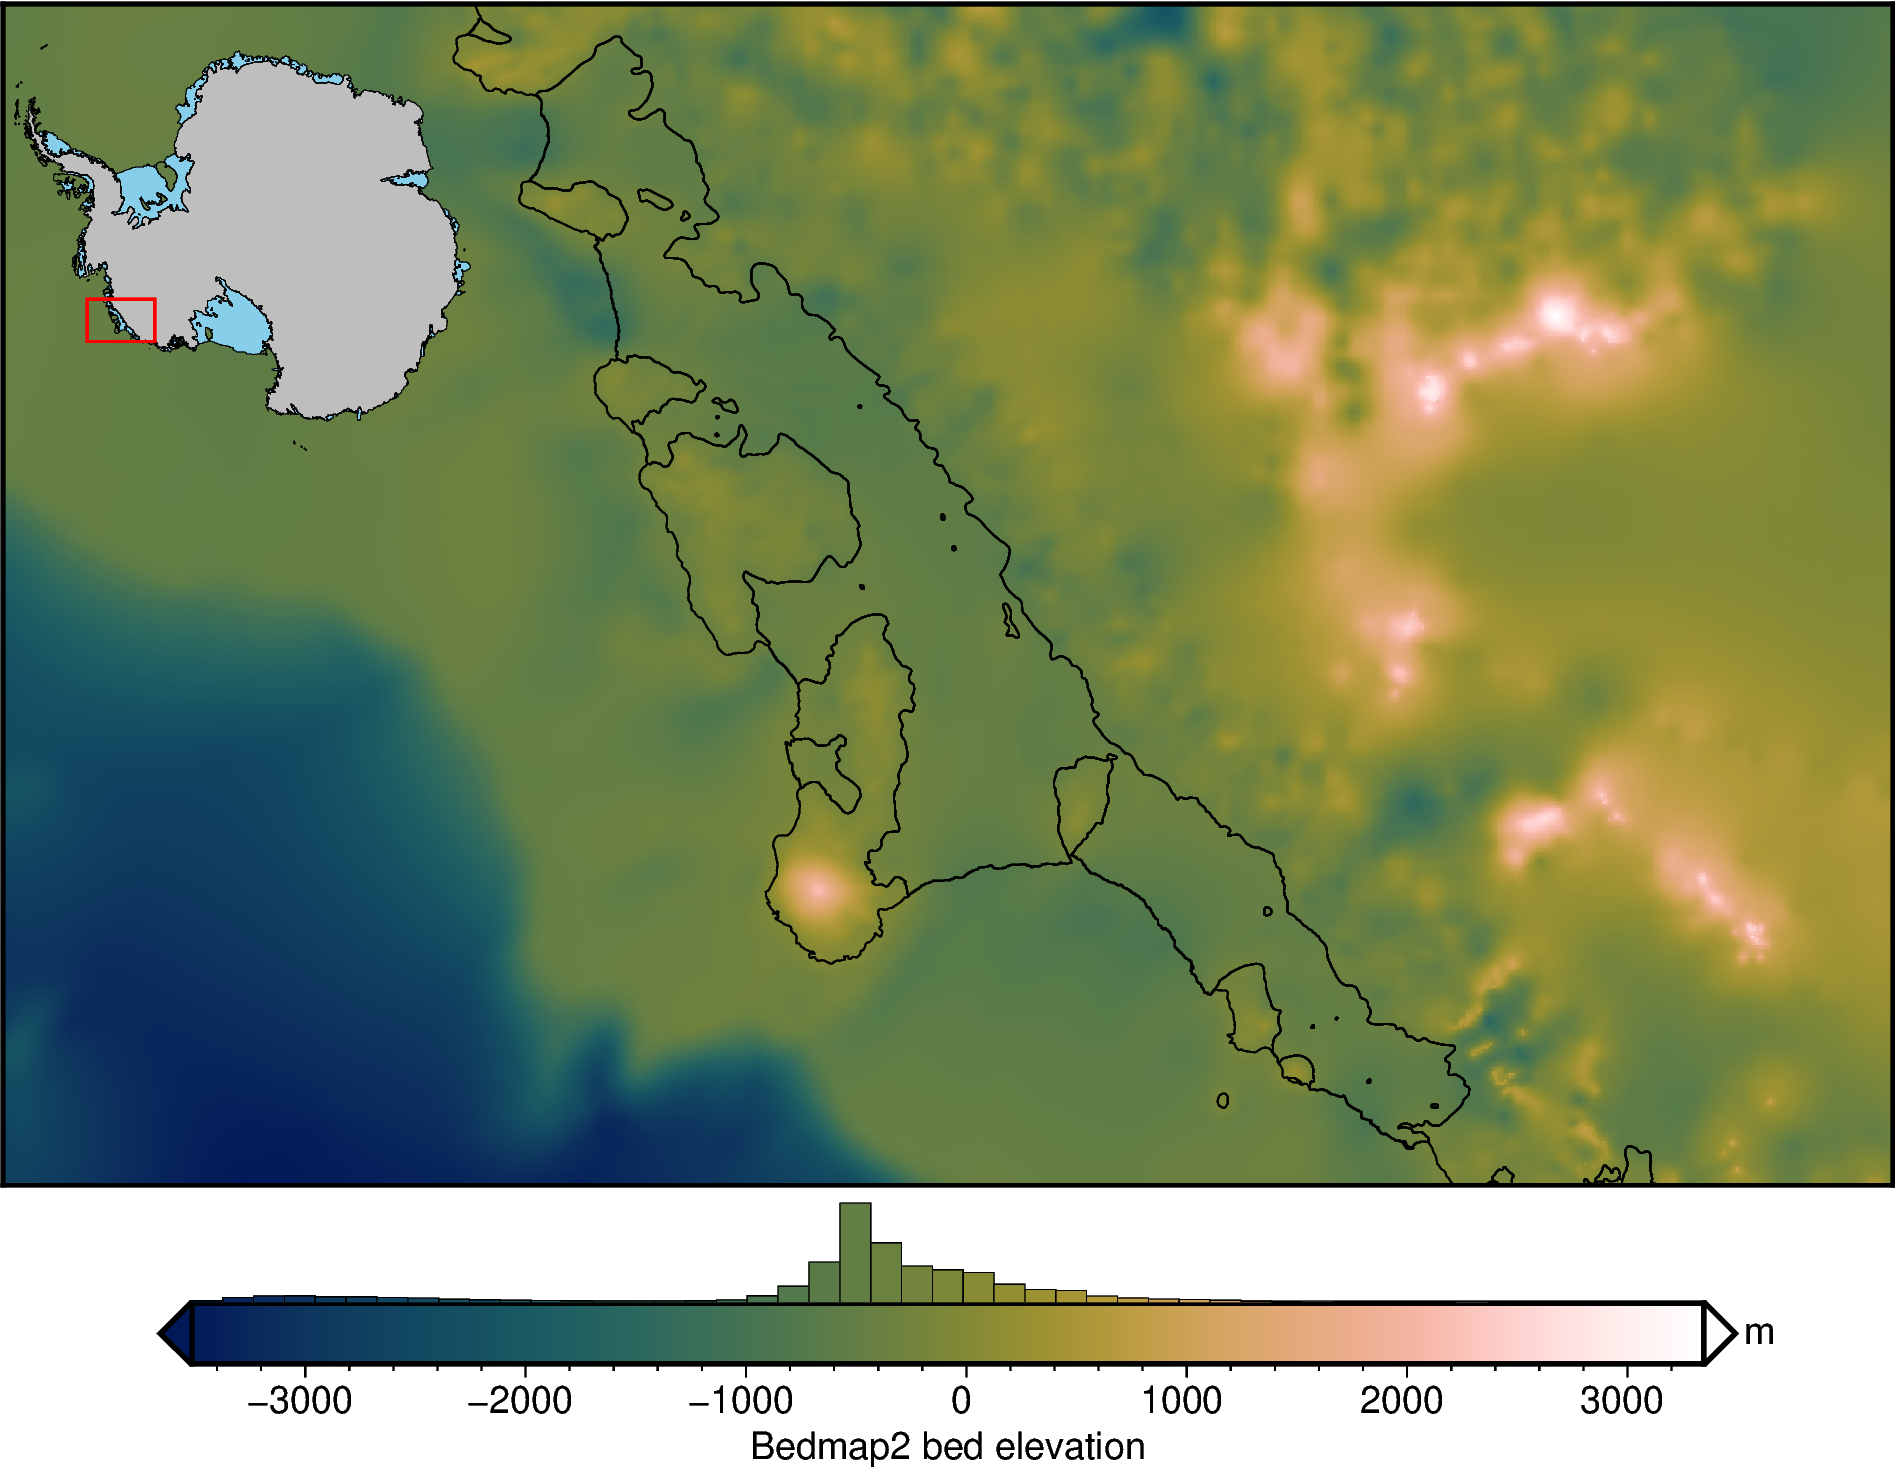

In [6]:
# create the first figure
fig = maps.plot_grd(
    grid1,
    cmap="batlowW",
    coast=True,
    cbar_label="Bedmap2 bed elevation",
    cbar_unit="m",
    hist=True,
    inset=True,
)

# display the figure
fig.show(dpi=200)

Add the second figure by passing the `fig` variable to `plot_grd`, and specifying `origin_shift`.

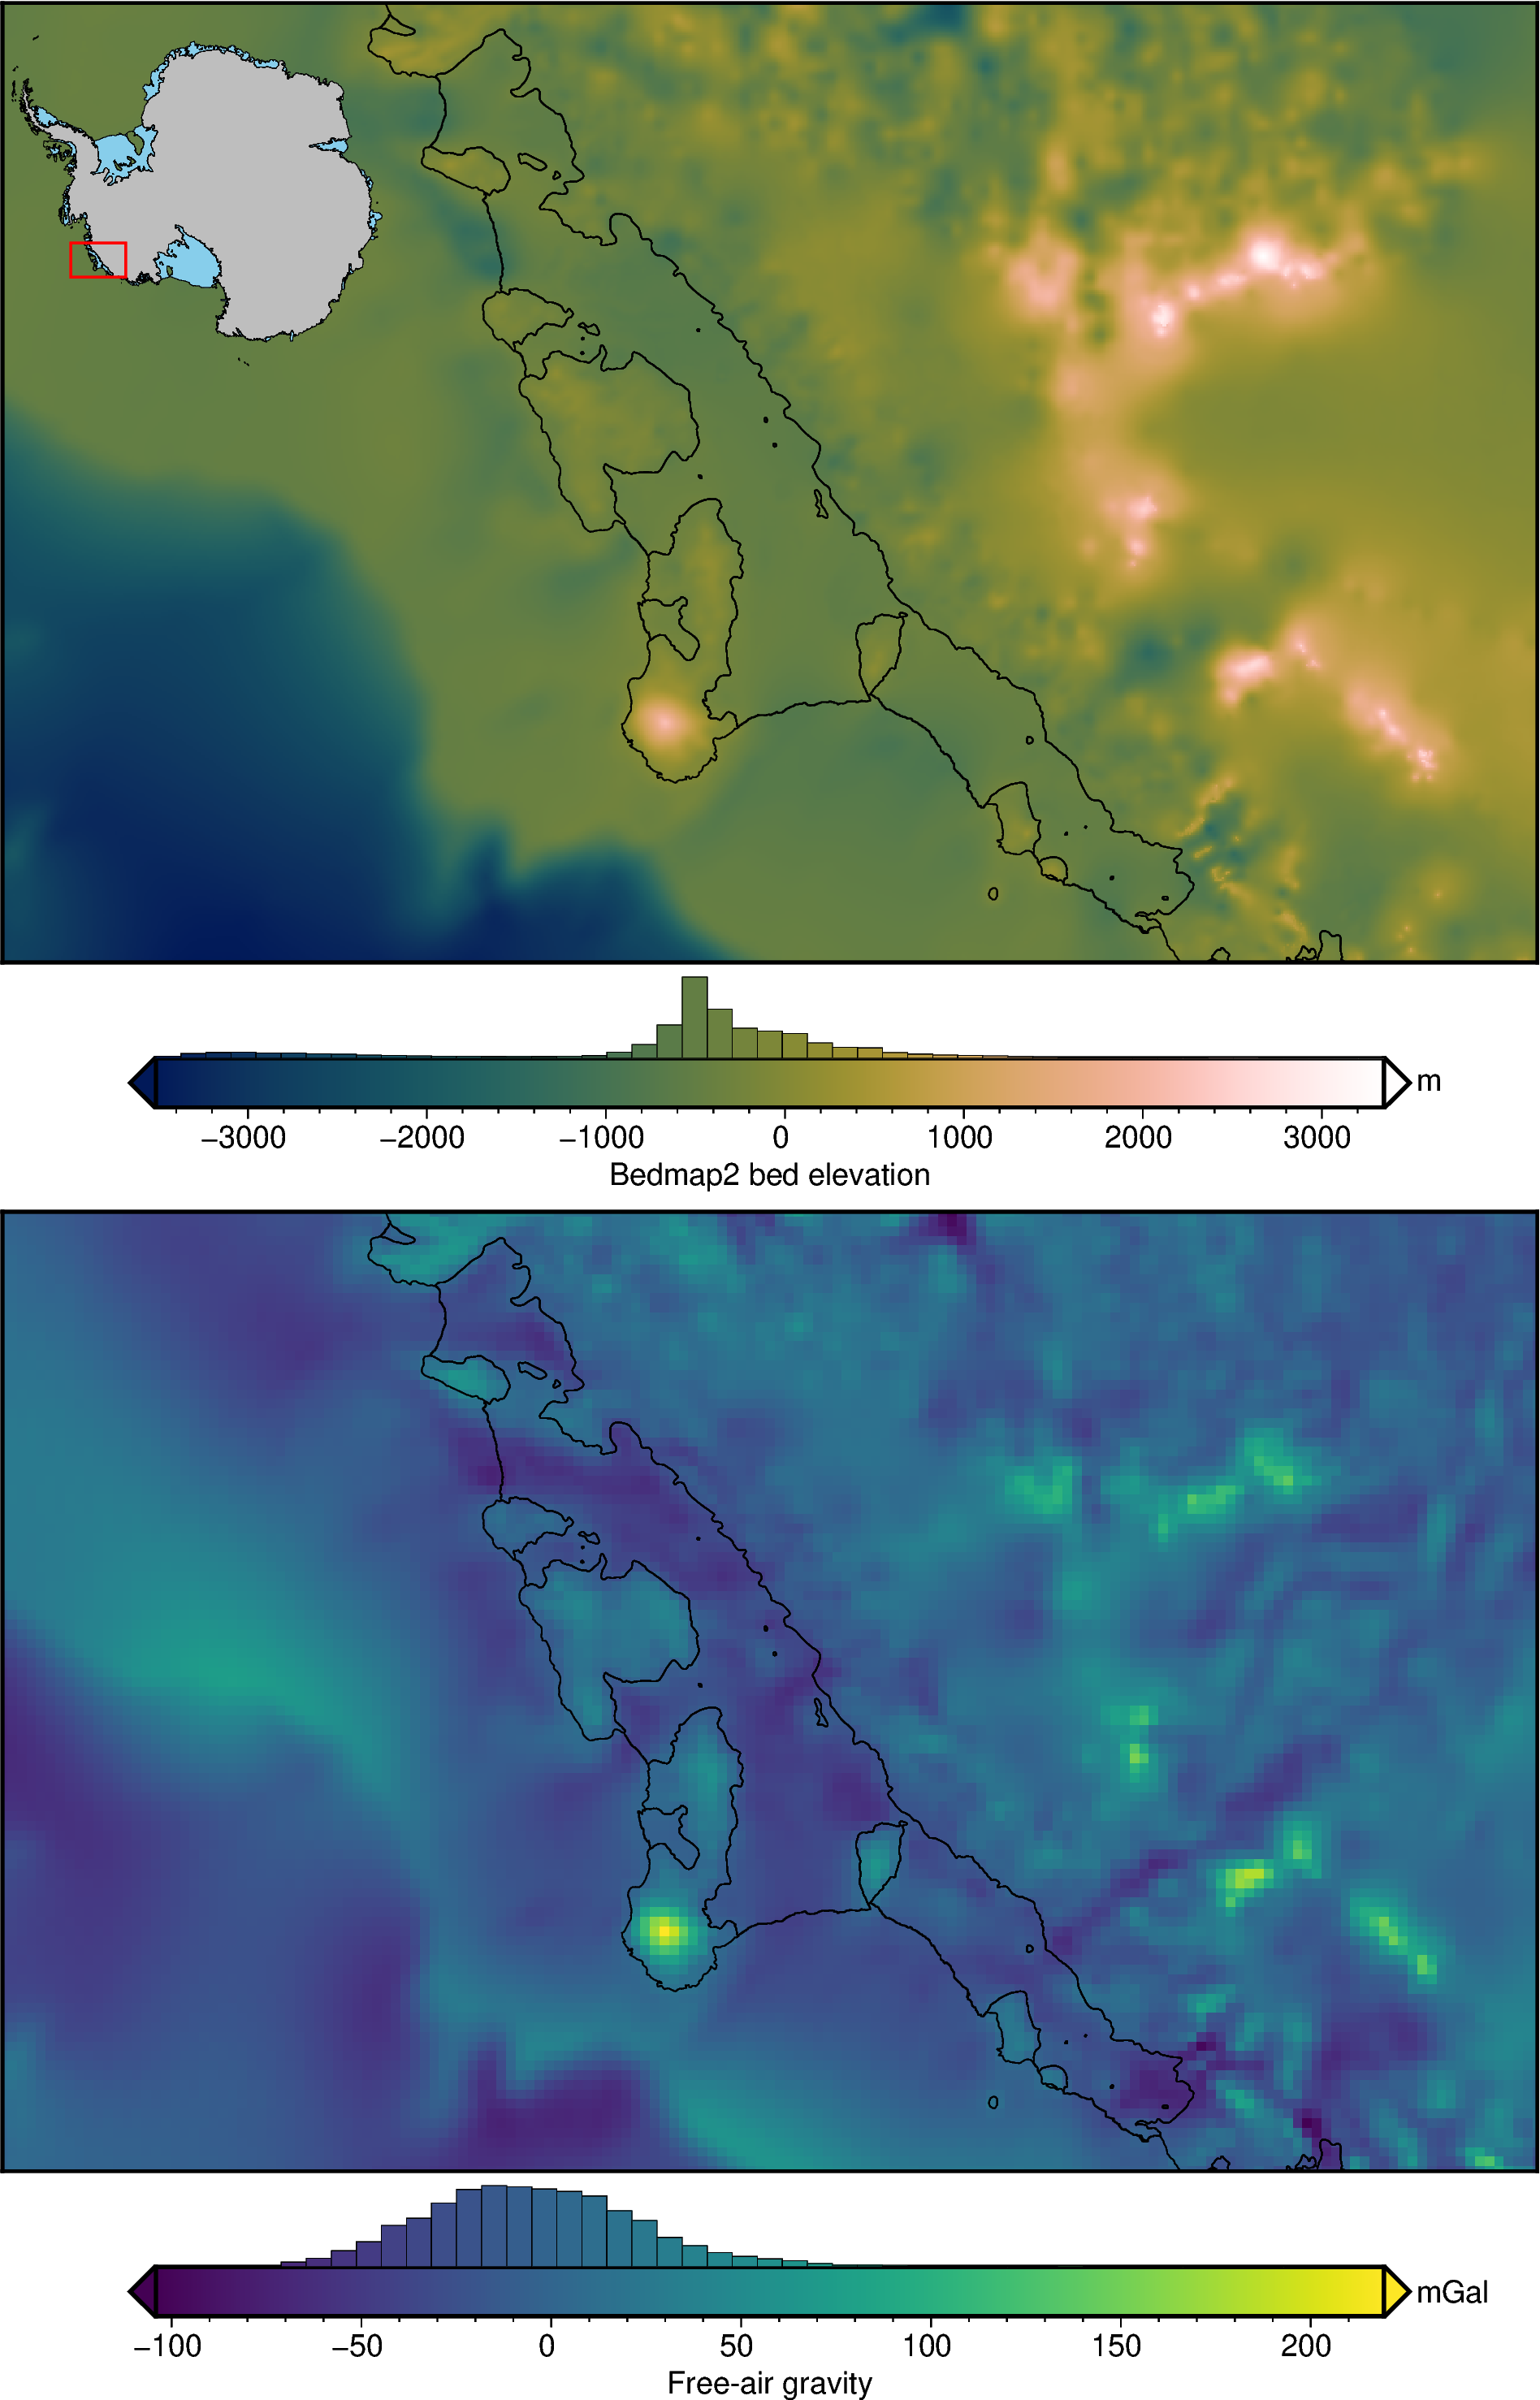

In [7]:
fig = maps.plot_grd(
    grid2,
    fig=fig,
    origin_shift="y",  # shift subplot in vertical direction
    yshift_amount=-1.05,  # default is -1, (1 figure height down)
    cmap="viridis",
    coast=True,
    cbar_label="Free-air gravity",
    cbar_unit="mGal",
    hist=True,
)

# display the figure
fig.show(dpi=200)

This also works with `maps.basemap` to create a subplot without a grid file.

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -1800000 to -1800156.9982
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -1000000 to -999961.979733
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from -1200000 to -1200225.03767
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from -700000 to -699825.036597


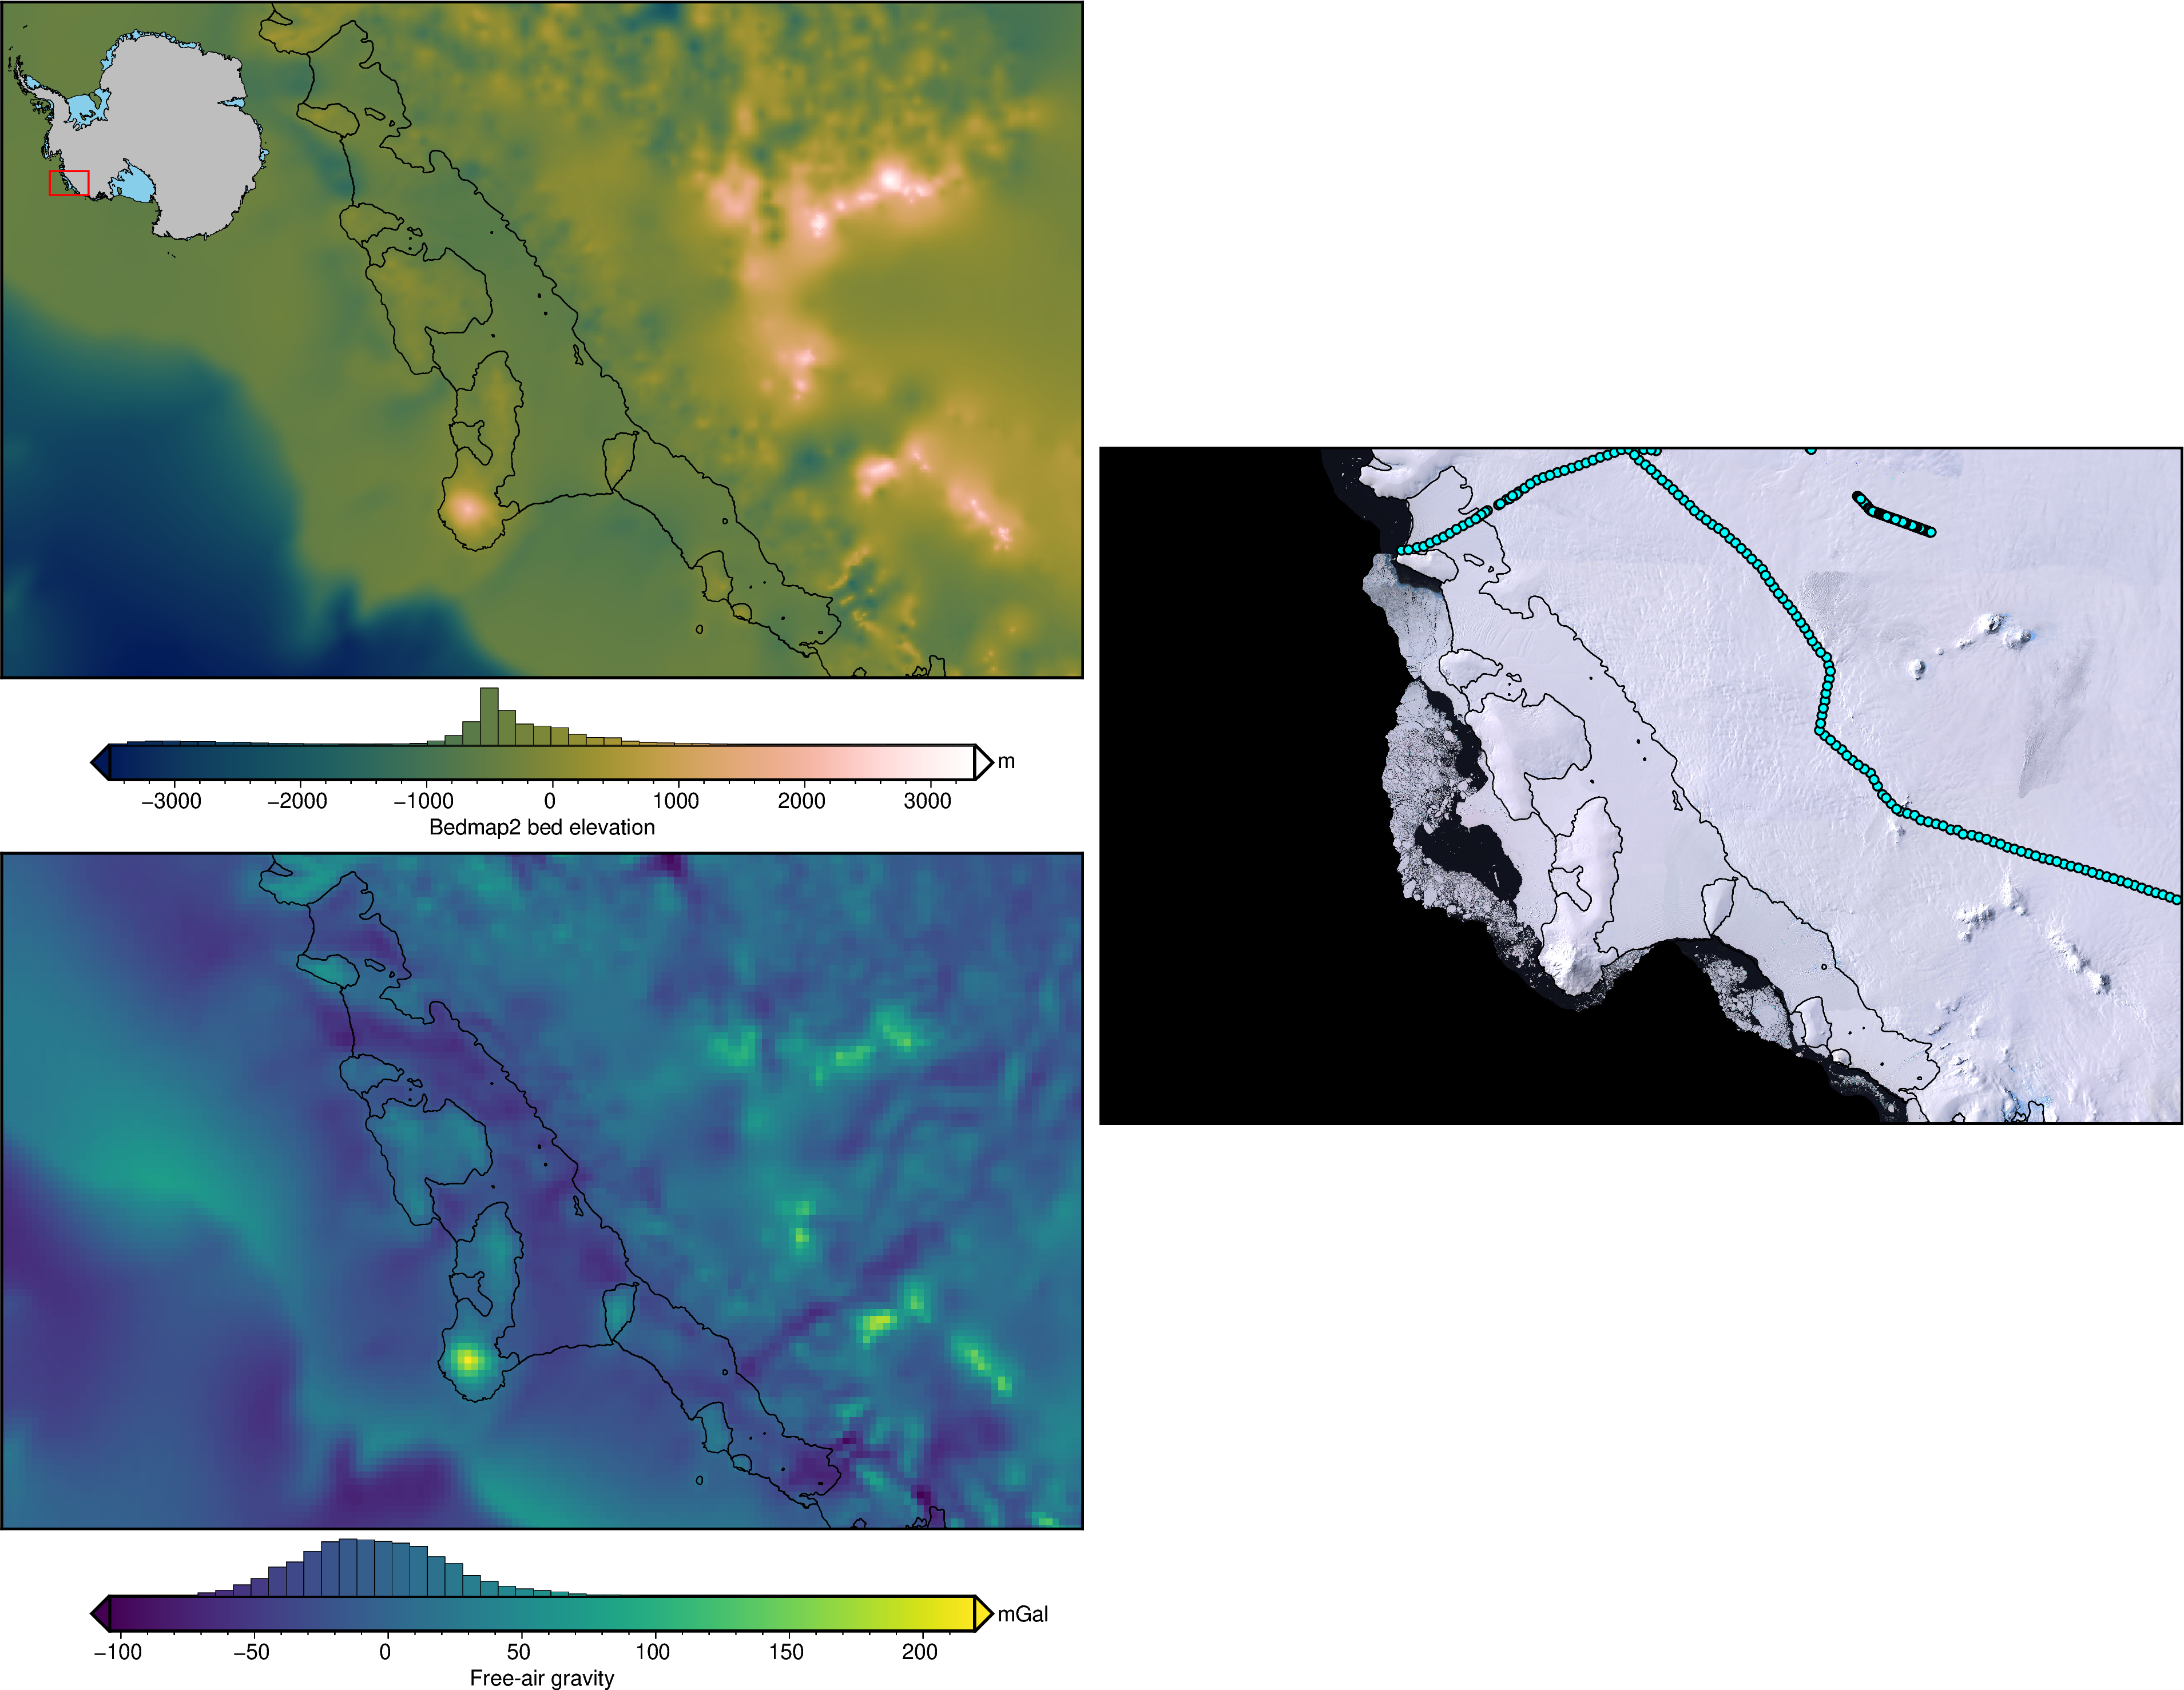

In [8]:
fig = maps.basemap(
    fig=fig,
    region=region,
    imagery_basemap=True,
    origin_shift="both",  # shift in both x and y directions
    yshift_amount=0.5,  # shift up by half a figure height
    xshift_amount=1,  # shift right by one figure width
    coast=True,
    points=fetch.bedmap_points(version="bedmap1", region=region),
    points_fill="cyan",
)

# display the figure
fig.show(dpi=200)